In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
from pandas.io.json import json_normalize
import numpy as np
from FUNCIONES_TASAS import *

In [2]:
df=abrir_datos(url="/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/ANALISIS_DATOS/BASES_DE_DATOS/datos_completos.json")

/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/ANALISIS_DATOS/CODIGOS_ANALISIS/FUNCIONES_TASAS.py:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_ticker = json_normalize(ticker_data)


In [3]:
AL30D_N = df[df['ticker'] == 'AL30D'].reset_index(drop=True)
GD30D_N = df[df['ticker'] == 'GD30D'].reset_index(drop=True)
AL30_N = df[df['ticker'] == 'AL30'].reset_index(drop=True)
GD30_N = df[df['ticker'] == 'GD30'].reset_index(drop=True)

In [4]:
AL30D=limpiar_datos_tasas(AL30D_N)
AL30=limpiar_datos_tasas(AL30_N)
GD30D=limpiar_datos_tasas(GD30D_N)
GD30=limpiar_datos_tasas(GD30_N)

In [5]:
dato_muestra=GD30

# ANALISIS DIFERENCIA ENTRE COLOCAR Y TOMAR 

In [6]:
datos=dato_muestra[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]

In [7]:
datos_colocar_tomar=datos[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]
datos_tomar_colocar=datos[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]

**CORRELACION COLOCAR T0 TOMAR T+2**

<Axes: xlabel='fecha'>

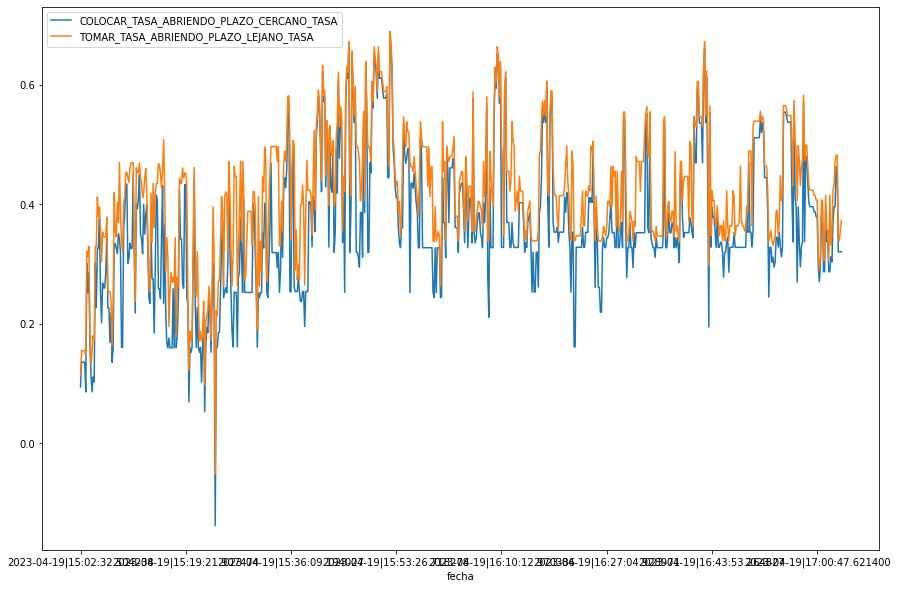

In [8]:
datos[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]].plot(figsize=(15,10))

**SPREAD**

In [9]:
datos_colocar_tomar["SPREAD_colocar_tomar"]=datos_colocar_tomar["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-datos_colocar_tomar["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_62642/2596658964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_colocar_tomar["SPREAD_colocar_tomar"]=datos_colocar_tomar["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-datos_colocar_tomar["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]


**PORQUE NO HAY SPREAD POSITIVO??**

<Axes: xlabel='fecha'>

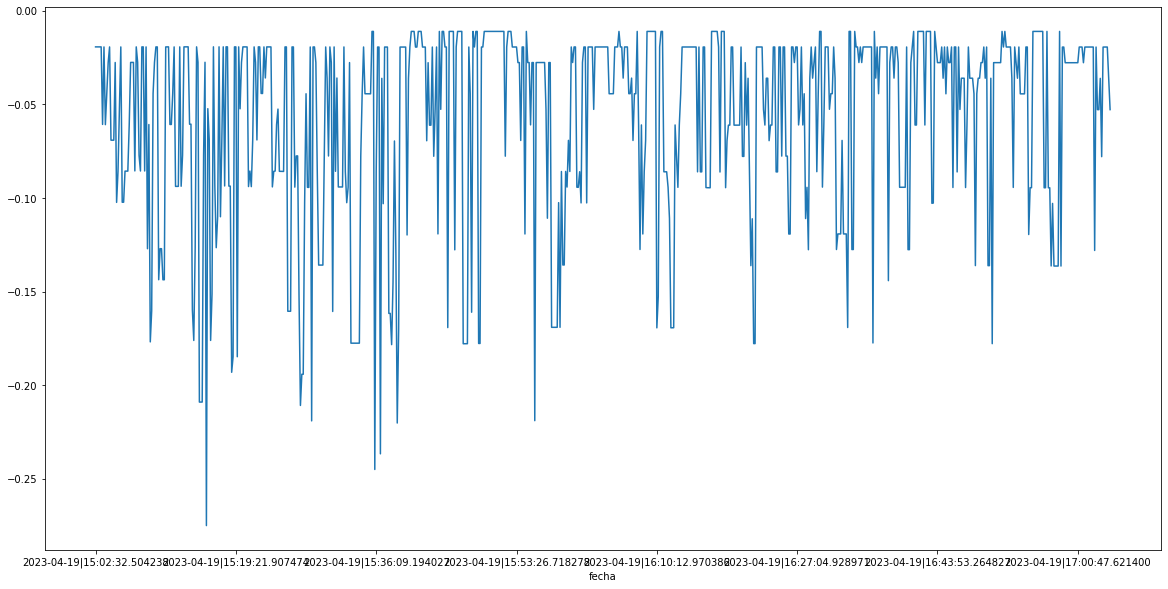

In [10]:
datos_colocar_tomar["SPREAD_colocar_tomar"].plot(figsize=(20,10))

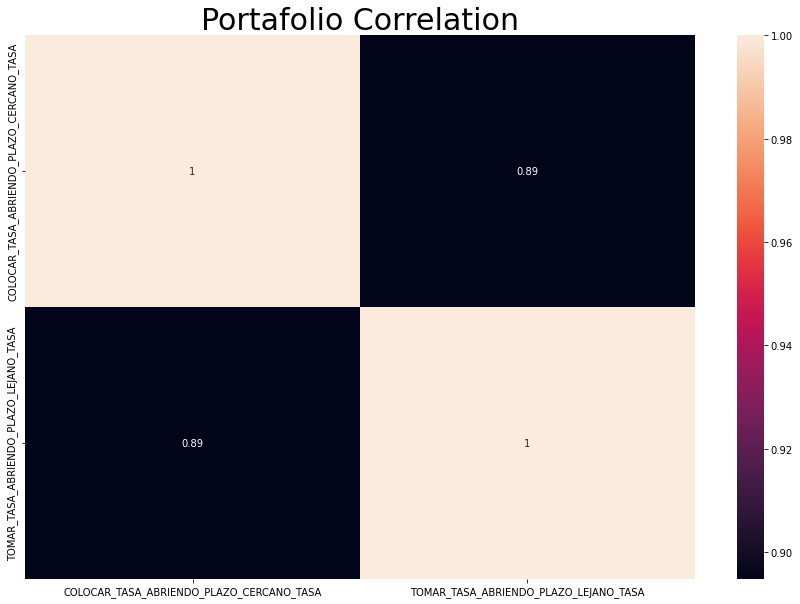

In [11]:
DATOS_1_PLOT=datos_colocar_tomar[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]
correlation_mat=DATOS_1_PLOT.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

**SUPONGAMOS QUE HAY UNA ORDEN DE COLOCAR Y TOMAR CON BASE EN LOS SPREADS, QUE NOS CONVENDRIA, QUE LAS VARIABLES ESTEN FUERTEMENTE CORRELACIONADAS O NO LO ESTEN? SI LA CORRELACION ES ALTA PUEDE QUE HAYA MAS SPREAD O MENOR SPREAD?**

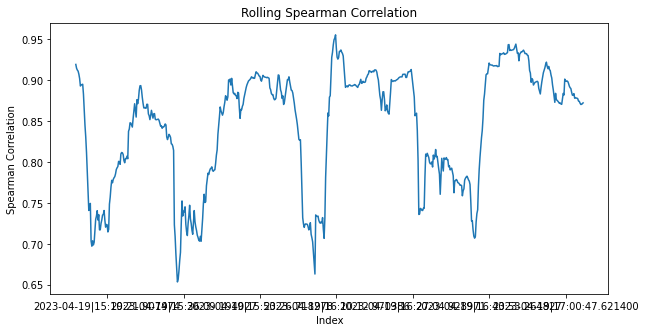

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

col1 = "COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"
col2 = "TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"
ROLLING_FACTOR = 60
rolling_corr_COLOCAR_TOMAR = datos_colocar_tomar[col1].rolling(ROLLING_FACTOR).corr(datos_colocar_tomar[col2])


rolling_corr_COLOCAR_TOMAR.plot(figsize=(10, 5))
plt.xlabel('Index')
plt.ylabel('Spearman Correlation')
plt.title('Rolling Spearman Correlation')
plt.show()

In [13]:
print(np.var(rolling_corr_COLOCAR_TOMAR))
print(np.mean(rolling_corr_COLOCAR_TOMAR))

0.00517322341154896
0.8442879759208065


#  TOMAR T0 COLOCAR T+2

**SPREAD**

In [14]:
datos_tomar_colocar["SPREAD_tomar_colocar"]=datos_tomar_colocar["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-datos_tomar_colocar["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_62642/4178131562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_tomar_colocar["SPREAD_tomar_colocar"]=datos_tomar_colocar["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-datos_tomar_colocar["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]


<Axes: xlabel='fecha'>

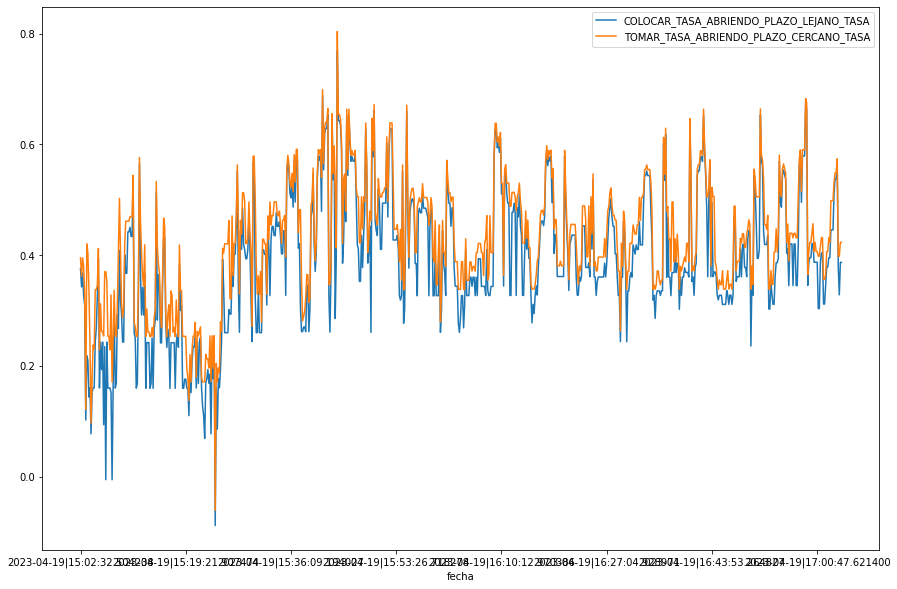

In [15]:
datos[["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]].plot(figsize=(15,10))

**POORQUE EL SPREAD ES POSITIVO**

<Axes: xlabel='fecha'>

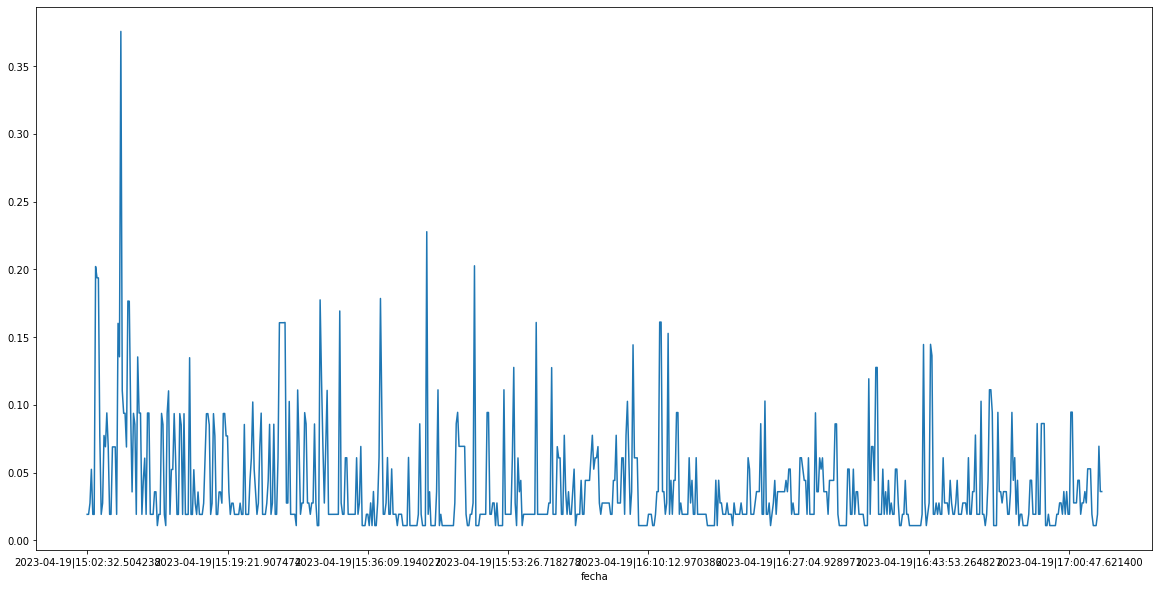

In [16]:
datos_tomar_colocar["SPREAD_tomar_colocar"].plot(figsize=(20,10))

**CORRELACION TOMAR T0 COLOCAR T+2**

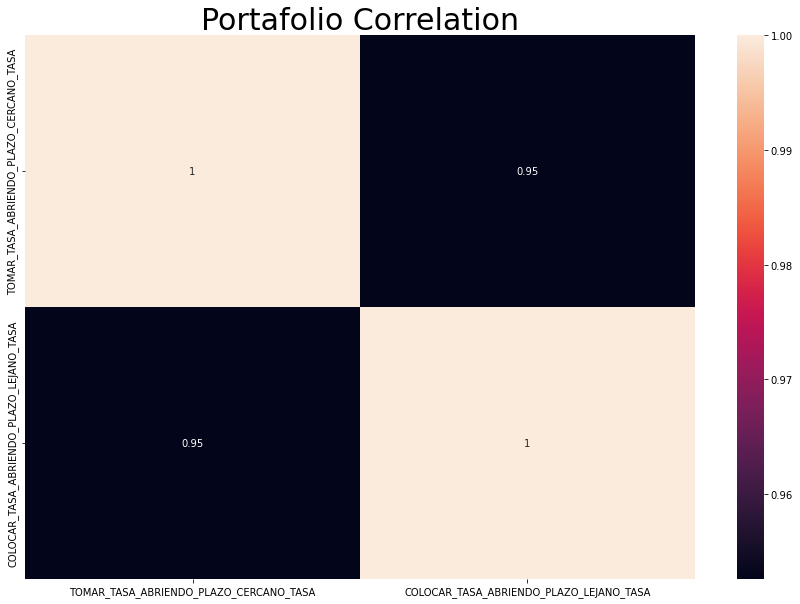

In [17]:
DATOS_2_PLOT=datos_tomar_colocar[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]
correlation_mat=DATOS_2_PLOT.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

**NOTEMOS QUE LA VARIABLE DE TOMAR 0 Y COLOCAR T+2 ES MAS ESTABLE EN LA VARIANZA Y LA MEDIA MAS ALTA, ESTO QUE SIGNIFICA? MISMA PREGUNTA QUE LA ANTERIOR**

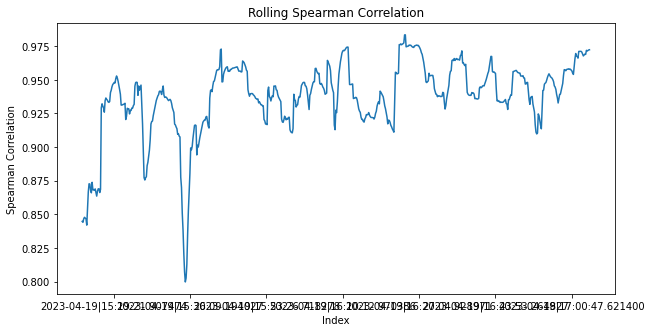

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

col1 = "TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"
col2 = "COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"
ROLLING_FACTOR = 60
rolling_corr_TOMAR_COLOCAR = datos_tomar_colocar[col1].rolling(ROLLING_FACTOR).corr(datos_tomar_colocar[col2])


rolling_corr_TOMAR_COLOCAR.plot(figsize=(10, 5))
plt.xlabel('Index')
plt.ylabel('Spearman Correlation')
plt.title('Rolling Spearman Correlation')
plt.show()

In [19]:
print("Correlacion entre Tomar0 y Colocar+2")
print("Media de correlaciones: ",np.mean(rolling_corr_TOMAR_COLOCAR))
print("Varianza de correlaciones: ",np.var(rolling_corr_TOMAR_COLOCAR))
print(" ")
print("Correlacion entre Colocar0 y Tomar+2")
print("Media de correlaciones: ",np.mean(rolling_corr_COLOCAR_TOMAR))
print("Varianza de correlaciones: ",np.var(rolling_corr_COLOCAR_TOMAR))

Correlacion entre Tomar0 y Colocar+2
Media de correlaciones:  0.9370254377073916
Varianza de correlaciones:  0.000769987346915765
 
Correlacion entre Colocar0 y Tomar+2
Media de correlaciones:  0.8442879759208065
Varianza de correlaciones:  0.00517322341154896


# ANALISIS SPREADS COLOCAR T0 COLOCAR T+2 Y TOMAR T0 TOMAR +2

**PREGUNTA. QUE PASA SI EXISTE UNA SEÑAL, Y EN ESTE MOMENTO LOS SPREADS ENTRE COLOCAR ACTUAL Y T+2 Y EL SPREAD ENTRE TOMAR 0 Y TOMAR +2, DEBERIA DE HABER MAS ESPACIO PARA TRIGGER?? SI EL SPREAD ENTRE AMBAS ES CORTO, PODRIA SIGNIFICAR MENIOR ESPACIO PARA TRIGGER**

In [20]:
datos_TOMAR=datos[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]

In [21]:
datos_TOMAR["SPREAD"]=datos_TOMAR["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]-datos_TOMAR["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_62642/3714019025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_TOMAR["SPREAD"]=datos_TOMAR["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]-datos_TOMAR["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]


<Axes: xlabel='fecha'>

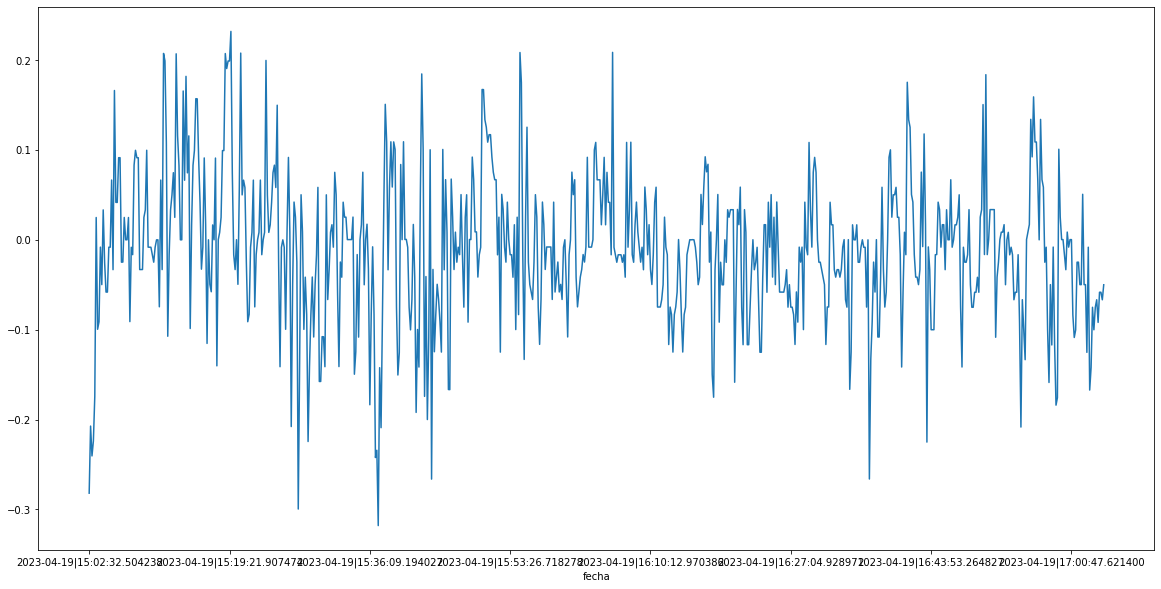

In [22]:
datos_TOMAR["SPREAD"].plot(figsize=(20,10))

In [23]:
datos_COLOCAR=datos[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]

In [24]:
datos_COLOCAR["SPREAD"]= datos_COLOCAR["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-datos_COLOCAR["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_62642/3234555845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_COLOCAR["SPREAD"]= datos_COLOCAR["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-datos_COLOCAR["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]


<Axes: xlabel='fecha'>

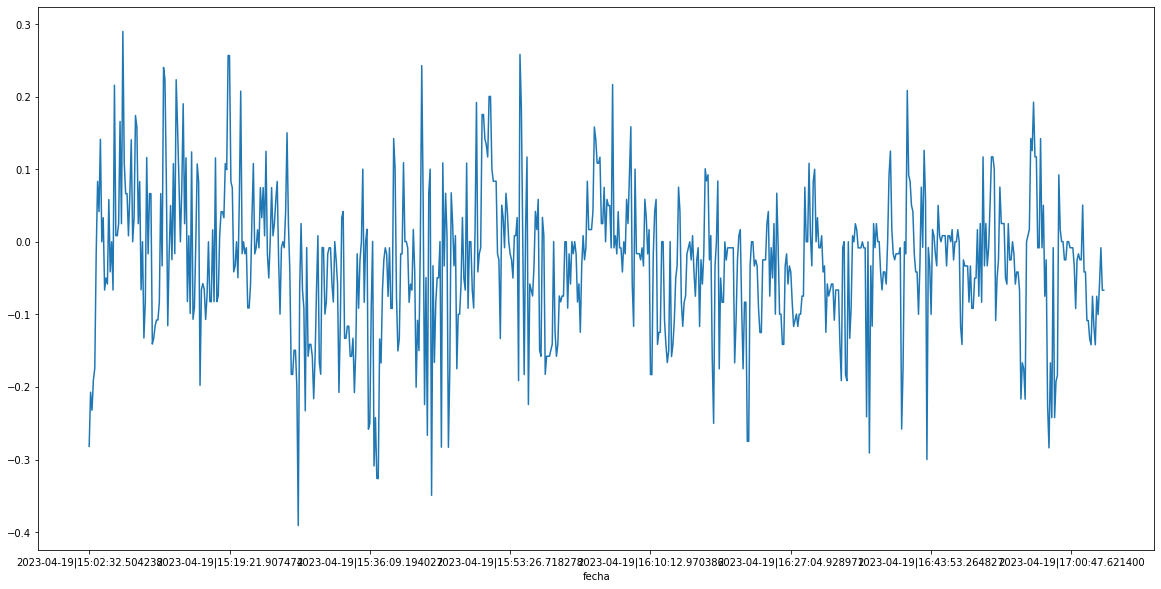

In [25]:
datos_COLOCAR["SPREAD"].plot(figsize=(20,10))

# ANALISIS CORRELACION  COLOCAR T0 COLOCART+2 Y TOMAR 0 TOMAR T+2

**TOMAR 0 TOMAR +2**

In [26]:
datos_TOMAR=datos[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]

<Axes: xlabel='fecha'>

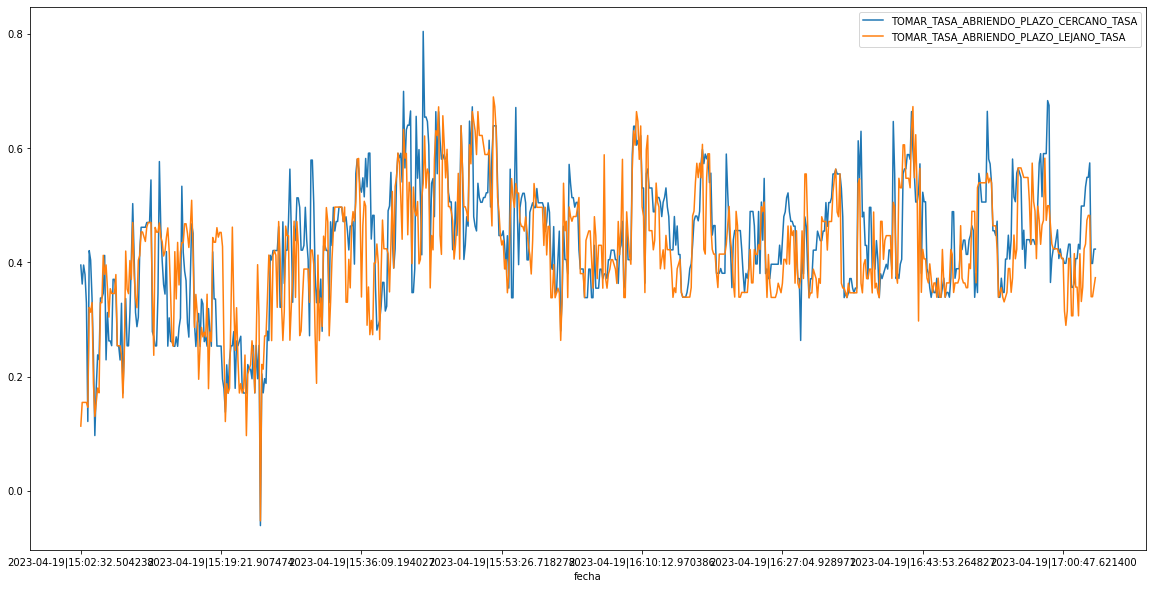

In [27]:
datos_TOMAR.plot(figsize=(20,10))

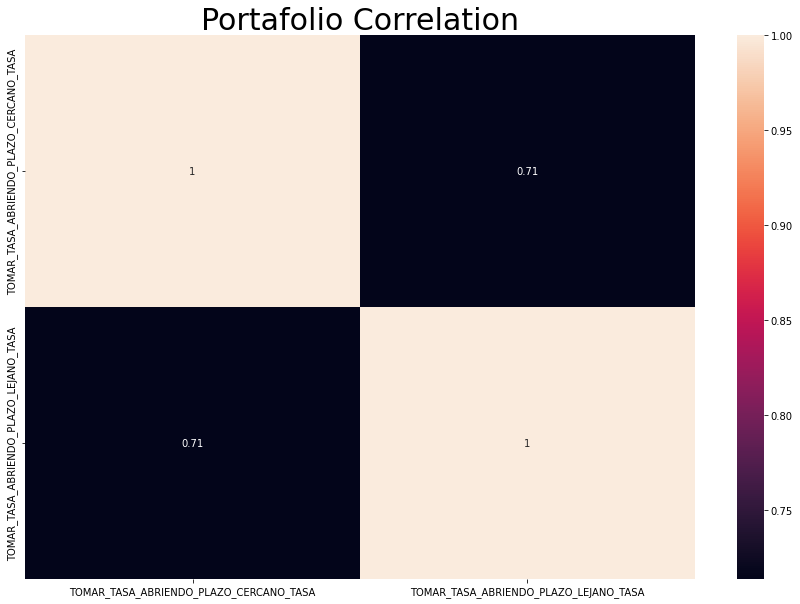

In [28]:
correlation_mat = datos_TOMAR.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

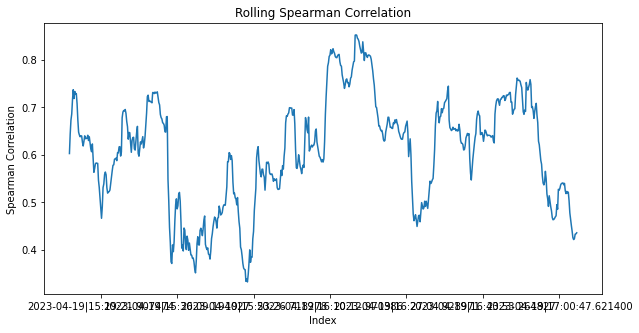

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

col1 = "TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"
col2 = "TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"
ROLLING_FACTOR = 60
rolling_corr_TOMAR_COLOCAR = datos_TOMAR[col1].rolling(ROLLING_FACTOR).corr(datos_TOMAR[col2])


rolling_corr_TOMAR_COLOCAR.plot(figsize=(10, 5))
plt.xlabel('Index')
plt.ylabel('Spearman Correlation')
plt.title('Rolling Spearman Correlation')
plt.show()

****COLOCAR 0 COLOCAR +2****

In [30]:
datos_COLOCAR=datos[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]]

<Axes: xlabel='fecha'>

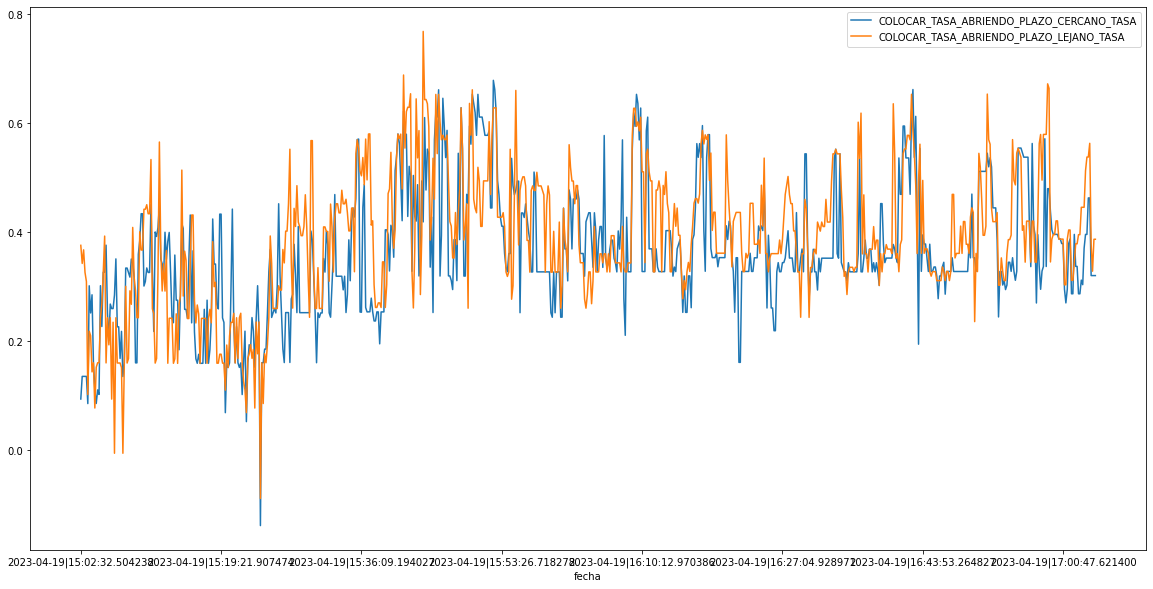

In [31]:
datos_COLOCAR.plot(figsize=(20,10))

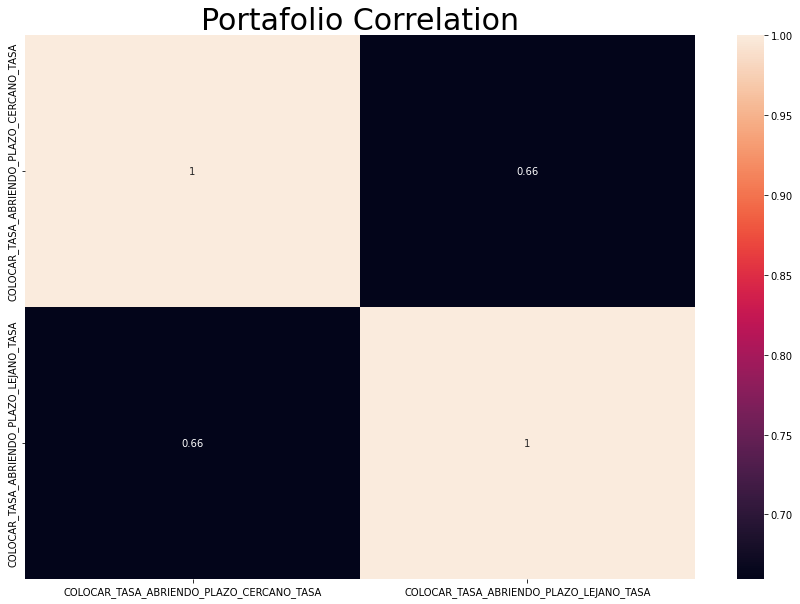

In [32]:
correlation_mat = datos_COLOCAR.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

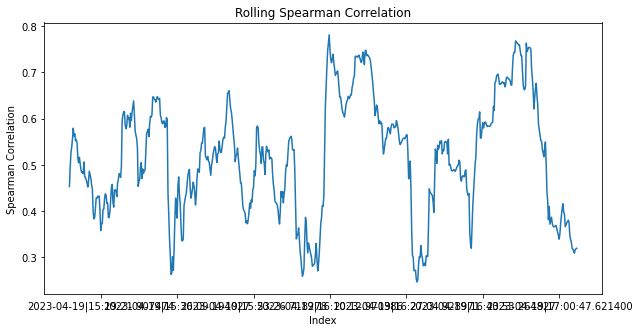

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

col1 = "COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"
col2 = "COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"
ROLLING_FACTOR = 60
rolling_corr_TOMAR_COLOCAR = datos_COLOCAR[col1].rolling(ROLLING_FACTOR).corr(datos_COLOCAR[col2])


rolling_corr_TOMAR_COLOCAR.plot(figsize=(10, 5))
plt.xlabel('Index')
plt.ylabel('Spearman Correlation')
plt.title('Rolling Spearman Correlation')
plt.show()

# ANALISIS DE SPREADS CON TASAS

In [34]:
dato_muestra["SPREAD_COLOCAR"]=dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-(dato_muestra["caucion_a_un_dia_ultimo_trade_tasa"]/100)
dato_muestra["SPREAD_TOMAR"]=(dato_muestra["caucion_a_un_dia_ultimo_trade_tasa"]/100)-dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]

**CENTRAR DATOS**

In [35]:
dato_muestra["SPREAD_CENTRADO_TOMAR"]=dato_muestra["SPREAD_TOMAR"]-dato_muestra["SPREAD_TOMAR"].mean()

**SPREAD_TOMAR_CENTRO**

<Axes: xlabel='fecha'>

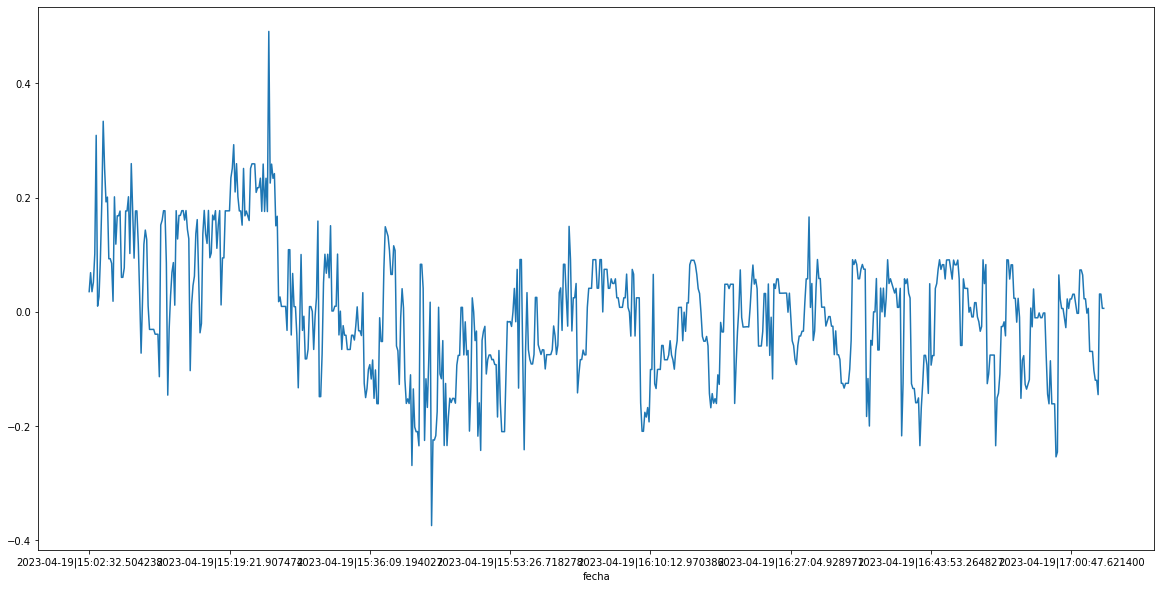

In [36]:
dato_muestra["SPREAD_CENTRADO_TOMAR"].plot(figsize=(20,10))

**SPREAD COLOCAR CENTRO**

In [37]:
dato_muestra["SPREAD_CENTRADO_COLOCAR"]=dato_muestra["SPREAD_COLOCAR"]-dato_muestra["SPREAD_COLOCAR"].mean()

<Axes: xlabel='fecha'>

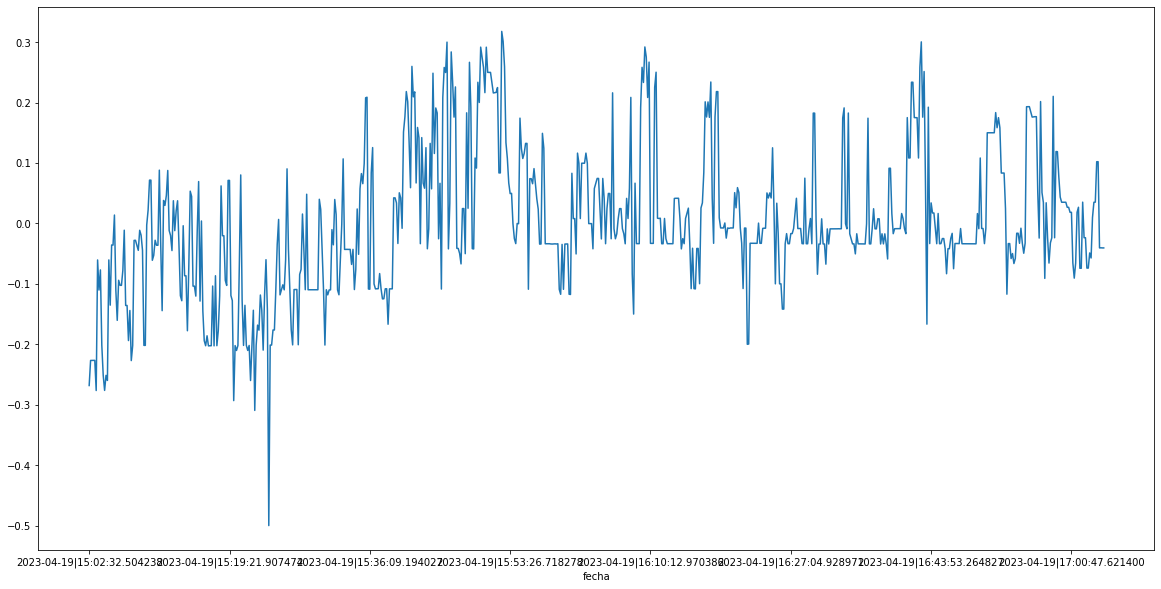

In [38]:
dato_muestra["SPREAD_CENTRADO_COLOCAR"].plot(figsize=(20,10))

In [39]:
df_centrado=dato_muestra[["SPREAD_CENTRADO_COLOCAR","SPREAD_CENTRADO_TOMAR"]]

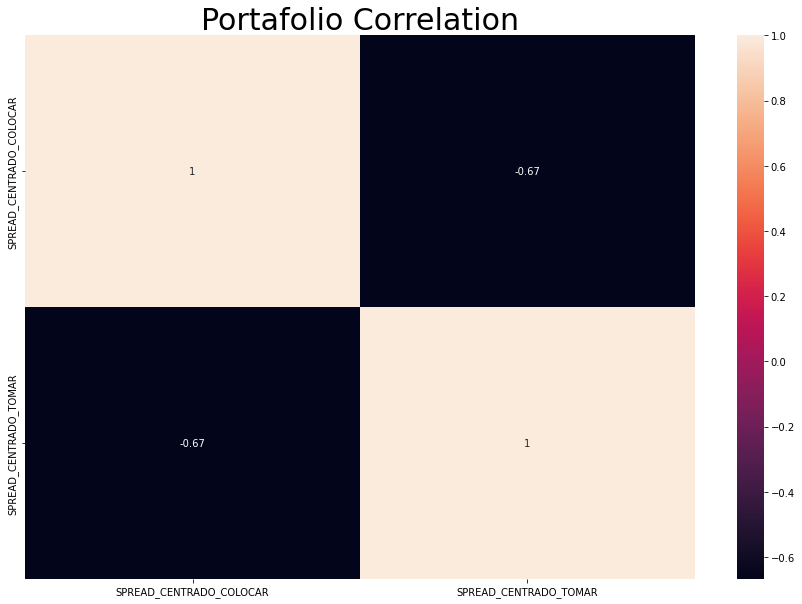

In [40]:
correlation_mat = df_centrado.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

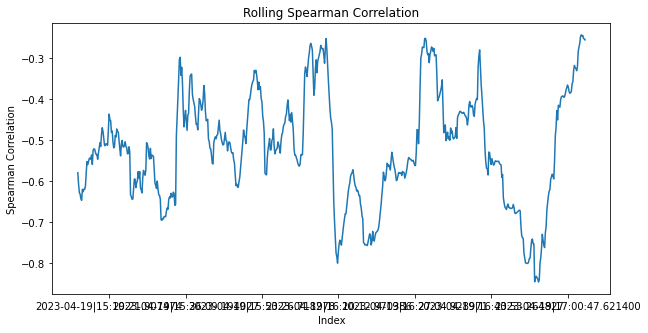

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

col1 = "SPREAD_CENTRADO_COLOCAR"
col2 = "SPREAD_CENTRADO_TOMAR"
ROLLING_FACTOR = 60
rolling_corr_COLOCAR_TOMAR = df_centrado[col1].rolling(ROLLING_FACTOR).corr(df_centrado[col2])


rolling_corr_COLOCAR_TOMAR.plot(figsize=(10, 5))
plt.xlabel('Index')
plt.ylabel('Spearman Correlation')
plt.title('Rolling Spearman Correlation')
plt.show()

# SPREAD DEL SPREAD??

In [42]:
df_centrado["SPREAD_DEL_SPREAD"]=df_centrado["SPREAD_CENTRADO_COLOCAR"]-df_centrado["SPREAD_CENTRADO_TOMAR"]

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_62642/3026973147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centrado["SPREAD_DEL_SPREAD"]=df_centrado["SPREAD_CENTRADO_COLOCAR"]-df_centrado["SPREAD_CENTRADO_TOMAR"]


<Axes: xlabel='fecha'>

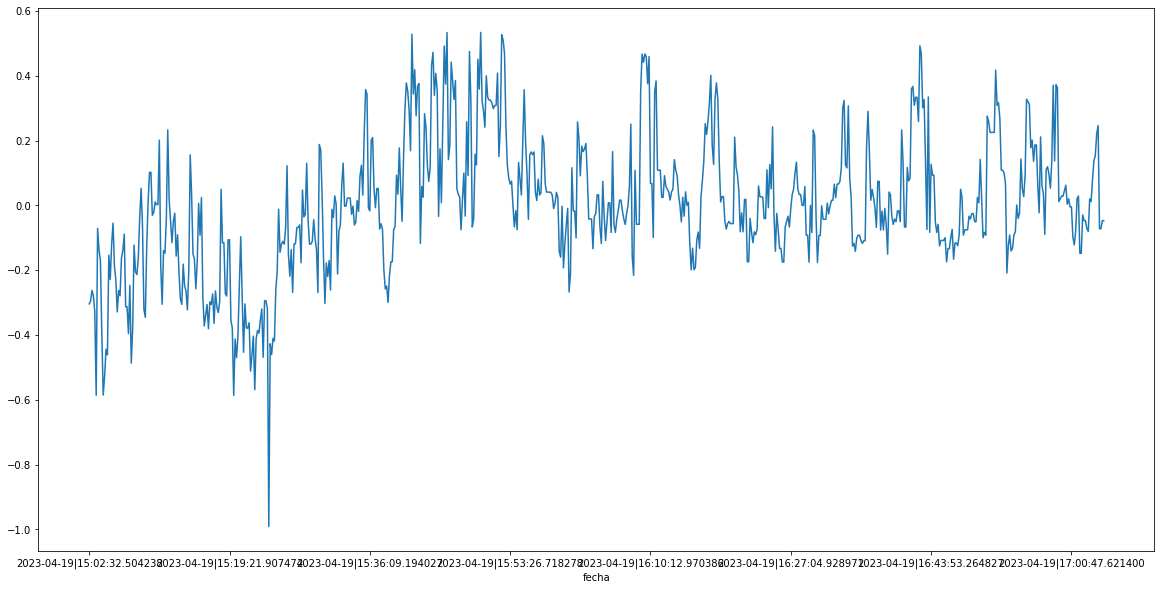

In [43]:
df_centrado["SPREAD_DEL_SPREAD"].plot(figsize=(20,10))